In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [2]:
df = pd.read_csv("../data/data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Chỉ quan tâm đến cột Adj Close
data = df['Adj Close']

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1960-01-04,4.52,4.52,4.52,4.52,4.52,0
1960-01-05,4.55,4.55,4.55,4.55,4.55,0
1960-01-06,4.68,4.68,4.68,4.68,4.68,0
1960-01-07,4.63,4.63,4.63,4.63,4.63,0
1960-01-08,4.59,4.59,4.59,4.59,4.59,0


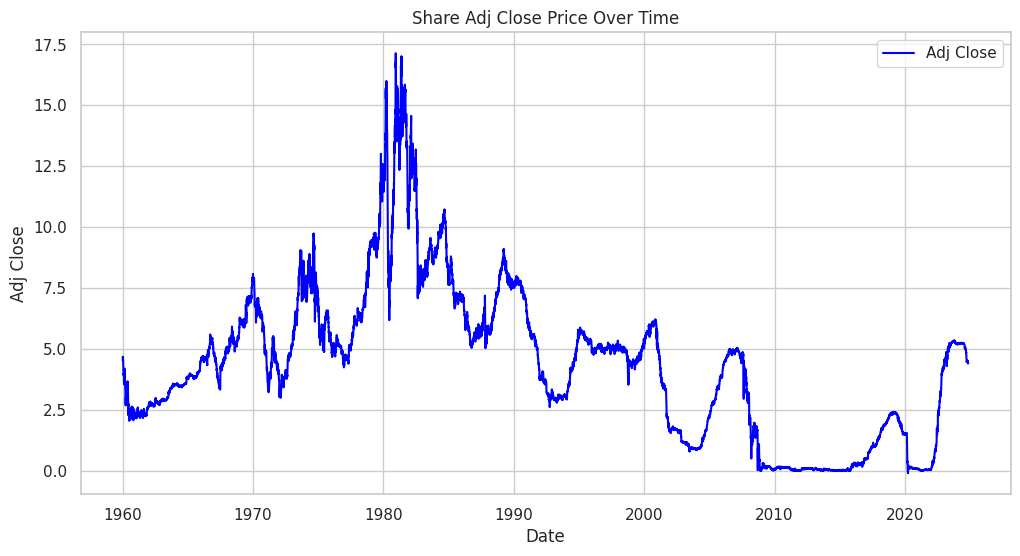

In [3]:
# Assuming df is your DataFrame
sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df, x='Date', y='Adj Close', label='Adj Close', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Share Adj Close Price Over Time')

plt.show()


# Resampling

To better understand the trend of the data we will use the resampling method, resampling the data on a monthly basis can provide a clearer view of trends and patterns, especially when we are dealing with daily data.

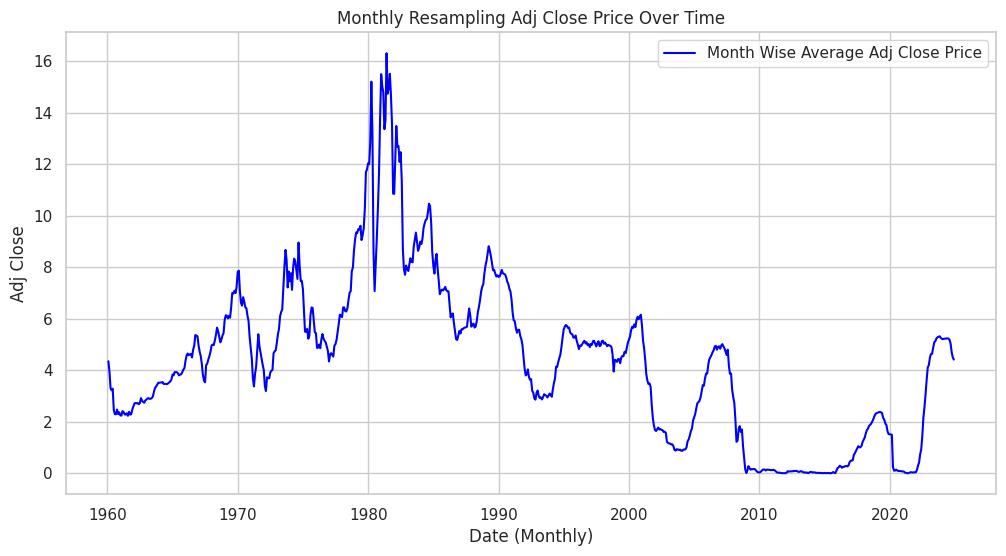

In [15]:
# Assuming df is your DataFrame with a datetime index
df_resampled_1m = df.resample('ME').mean() # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled_1m, x=df_resampled_1m.index, y='Adj Close', label='Month Wise Average Adj Close Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('Adj Close')
plt.title('Monthly Resampling Adj Close Price Over Time')

plt.show()


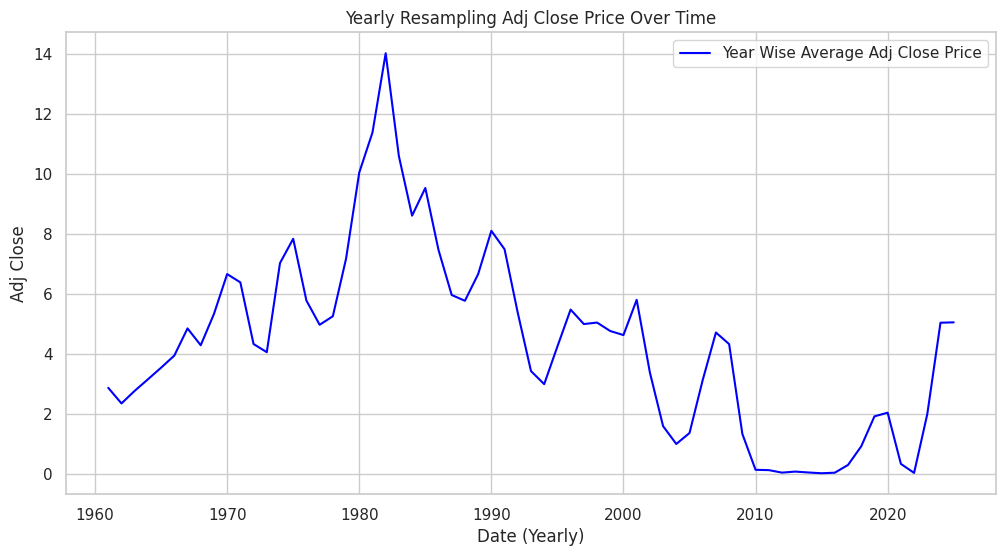

In [16]:
# Assuming df is your DataFrame with a datetime index
df_resampled_1y = df.resample('YE').mean() # Resampling to yearly frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled_1y, x=df_resampled_1y.index, y='Adj Close', label='Year Wise Average Adj Close Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Yearly)')
plt.ylabel('Adj Close')
plt.title('Yearly Resampling Adj Close Price Over Time')

plt.show()


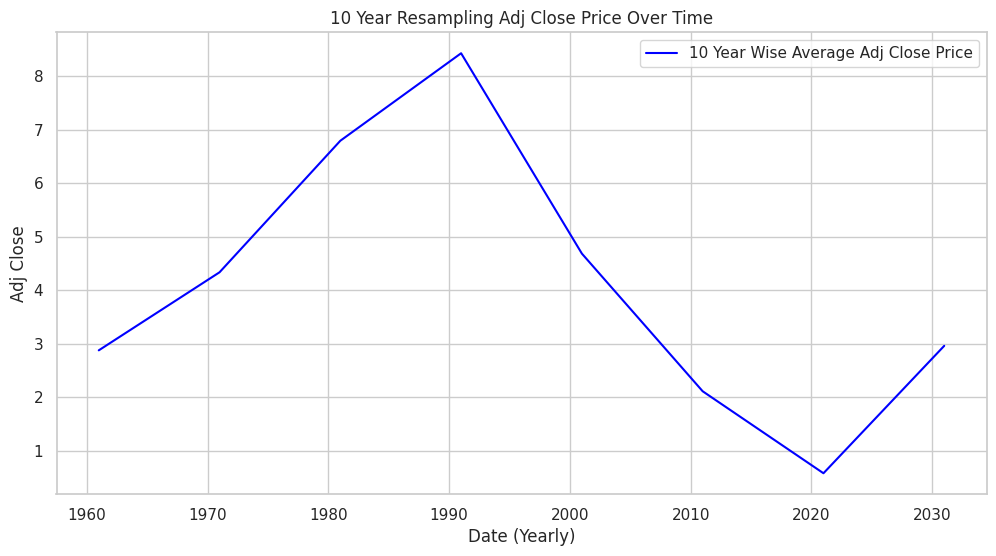

In [17]:
# Assuming df is your DataFrame with a datetime index
df_resampled_10y = df.resample('10YE').mean() # Resampling to 10 year frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled_10y, x=df_resampled_10y.index, y='Adj Close', label='10 Year Wise Average Adj Close Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Yearly)')
plt.ylabel('Adj Close')
plt.title('10 Year Resampling Adj Close Price Over Time')

plt.show()


In [18]:
print(df.shape)
print(df_resampled_1m.shape)
print(df_resampled_1m.head())
print(df_resampled_1y.shape)
print(df_resampled_1y.head())
print(df_resampled_10y.shape)
print(df_resampled_10y.head())

(16229, 6)
(779, 6)
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
1960-01-31  4.352000  4.352000  4.352000  4.352000   4.352000     0.0
1960-02-29  3.964211  3.964211  3.964211  3.964211   3.964211     0.0
1960-03-31  3.314783  3.314783  3.314783  3.314783   3.314783     0.0
1960-04-30  3.225500  3.225500  3.225500  3.225500   3.225500     0.0
1960-05-31  3.289048  3.289048  3.289048  3.289048   3.289048     0.0
(65, 6)
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
1960-12-31  2.872972  2.872972  2.872972  2.872972   2.872972     0.0
1961-12-31  2.352490  2.352490  2.352490  2.352490   2.352490     0.0
1962-12-31  2.772369  2.772369  2.772369  2.772369   2.772369     0.0
1963-12-31  3.156024  3.156024  3.156024  3.156024   3.156024     0.0
1964-12-31  3.545737  3.545737  3.545737  3.545737   3.545737 

# Detecting Seasonality Using Auto Correlation

We will detect Seasonality using the autocorrelation function (ACF) plot. Peaks at regular intervals in the ACF plot suggest the presence of seasonality.

In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Figure size 1200x600 with 0 Axes>

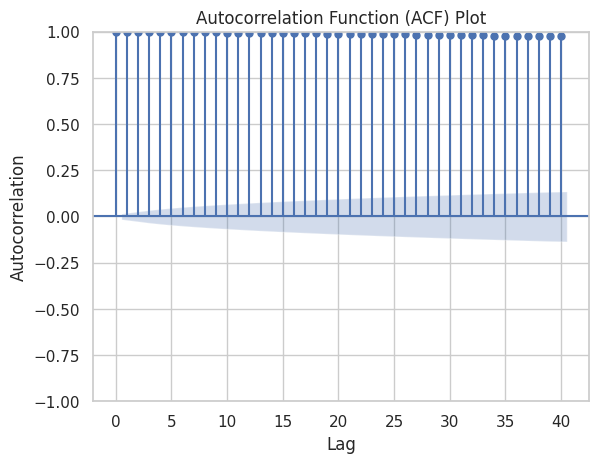

In [14]:
# If 'Date' is a column, but not the index, you can set it as the index
# df.set_index('Date', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Adj Close'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


Chua nhin thay tinh chu ky

<Figure size 1200x600 with 0 Axes>

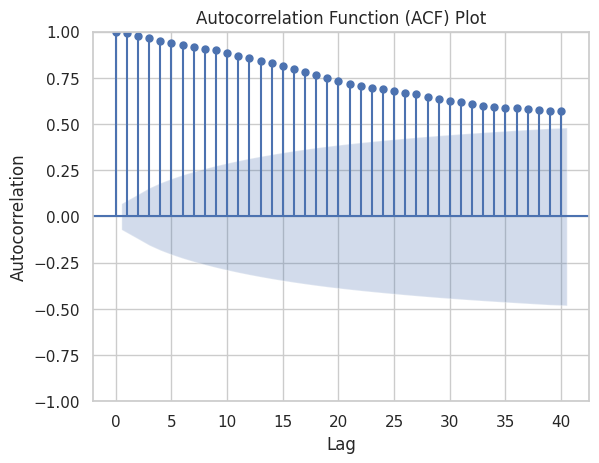

In [19]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df_resampled_1m['Adj Close'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

Chua nhin thay tinh chu ky

<Figure size 1200x600 with 0 Axes>

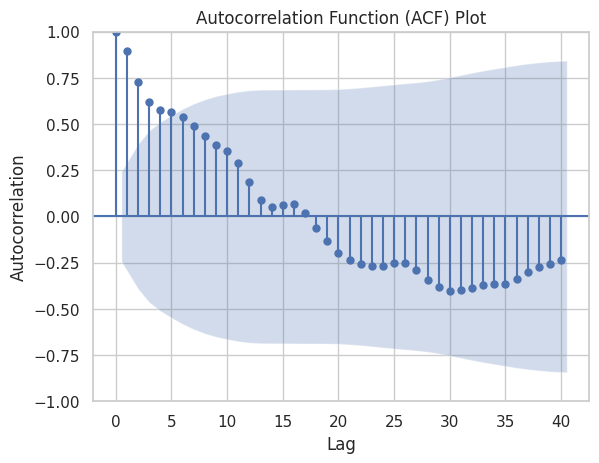

In [20]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df_resampled_1y['Adj Close'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

Chua nhin thay tinh chu ky

<Figure size 1200x600 with 0 Axes>

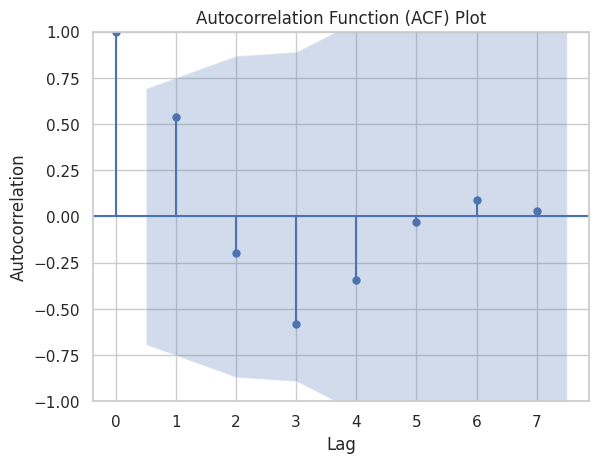

In [29]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df_resampled_10y['Adj Close'], lags=7) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

Dựa vào đồ thị Autocorrelation Function (ACF) của dữ liệu đã cho, có thể thấy rằng dữ liệu này có tính chu kỳ.

Các đặc điểm chỉ ra tính chu kỳ trong dữ liệu:

    Đồ thị ACF có những đỉnh và đáy lặp lại theo chu kỳ.

    Các giá trị ACF dao động lên xuống quanh 0, không có xu hướng tuyến tính liên tục.

    Các đỉnh/đáy trong đồ thị ACF xuất hiện cách nhau khoảng 4 lags, tức là 40 năm.
    
    Điều này cho thấy dữ liệu này có sự lặp lại các mô hình theo chu kỳ 70-80 năm.

Vì vậy, có thể kết luận rằng dữ liệu này thể hiện tính chu kỳ rõ ràng, chứng tỏ rằng biến số trong dữ liệu có những mẫu lặp lại theo thời gian.

# Detecting Stationarity

We will perform the ADF test to formally test for stationarity.

The test is based on the;

    Null hypothesis that a unit root is present in the time series, indicating that the series is non-stationary.
    The alternative hypothesis is that the series is stationary after differencing (i.e., it has no unit root).

The ADF test employs an augmented regression model that includes lagged differences of the series to determine the presence of a unit root.

In [31]:
from statsmodels.tsa.stattools import adfuller

result_1d = adfuller(df['Adj Close'])
print('Daily Data:')
print('ADF Statistic:', result_1d[0])
print('p-value:', result_1d[1])
print('Critical Values:', result_1d[4])

result_1m = adfuller(df_resampled_1m['Adj Close'])
print('Monthly Data:')
print('ADF Statistic:', result_1m[0])
print('p-value:', result_1m[1])
print('Critical Values:', result_1m[4])

result_1y = adfuller(df_resampled_1y['Adj Close'])
print('Yearly Data:')
print('ADF Statistic:', result_1y[0])
print('p-value:', result_1y[1])
print('Critical Values:', result_1y[4])

result_10y = adfuller(df_resampled_10y['Adj Close'])
print('10 Year Data:')
print('ADF Statistic:', result_10y[0])
print('p-value:', result_10y[1])
print('Critical Values:', result_10y[4])

Daily Data:
ADF Statistic: -2.340499287985867
p-value: 0.15923852249623738
Critical Values: {'1%': -3.4307540737286706, '5%': -2.861718584068758, '10%': -2.566865055822627}
Monthly Data:
ADF Statistic: -2.310357680576381
p-value: 0.16864917116860295
Critical Values: {'1%': -3.439006442437876, '5%': -2.865360521688131, '10%': -2.5688044403756587}
Yearly Data:
ADF Statistic: -1.6919704357548735
p-value: 0.43525422621831034
Critical Values: {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}
10 Year Data:
ADF Statistic: -2.0169012240720967
p-value: 0.27921202094664455
Critical Values: {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}


Viec kiem dinh tren du lieu theo 1d, 1m, 1y, 10y deu chi ra chuoi kho ma goi la dung.

Based on the ADF Statistici. e > all Critical Values, So, we accept the null hypothesis and conclude that the data does not appear to be stationary according to the Augmented Dickey-Fuller test.

This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.


# Smoothening the data using Differencing and Moving Average

Differencing involves subtracting the previous observation from the current observation to remove trends or seasonality. 

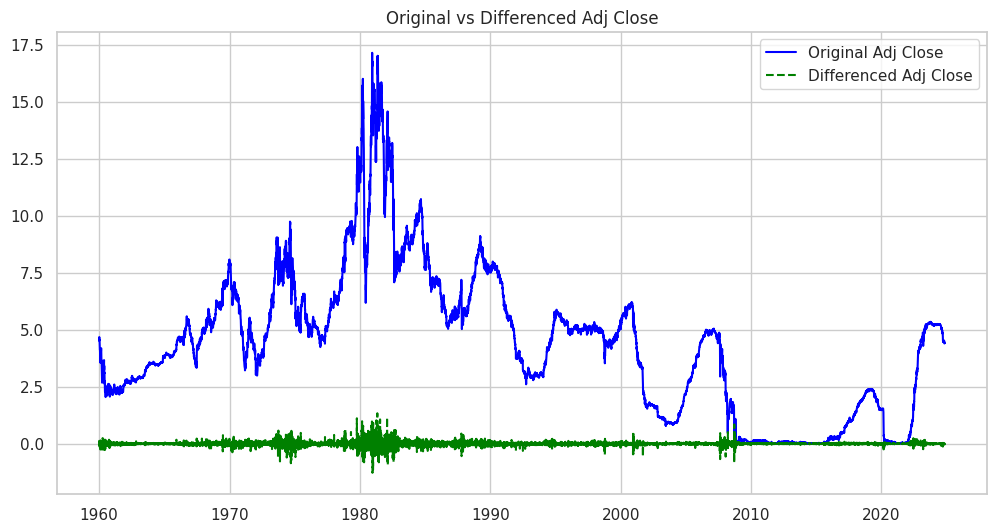

In [32]:
# Differencing
df['Adj Close_diff'] = df['Adj Close'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Original Adj Close', color='blue')
plt.plot(df['Adj Close_diff'], label='Differenced Adj Close', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced Adj Close')
plt.show()


<Figure size 1200x600 with 0 Axes>

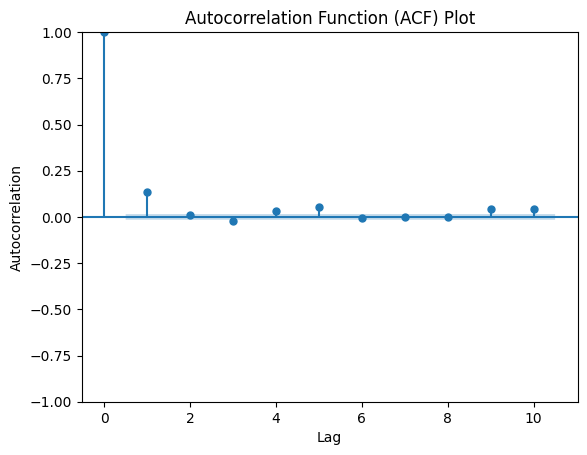

In [84]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Adj Close_diff'], lags=10) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

<Figure size 1200x600 with 0 Axes>

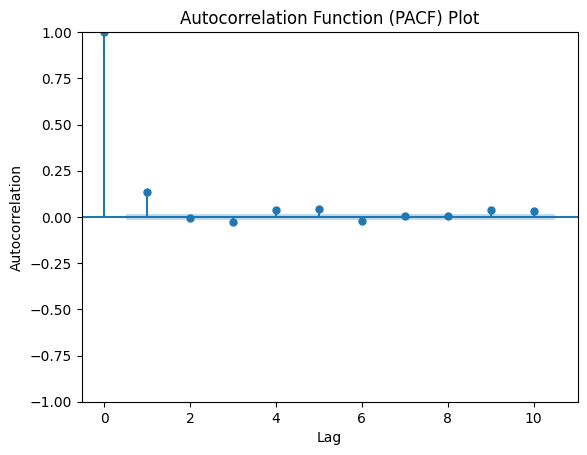

In [85]:
# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Adj Close_diff'], lags=10) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (PACF) Plot')
plt.show()

/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predicti

Test RMSE: 0.026


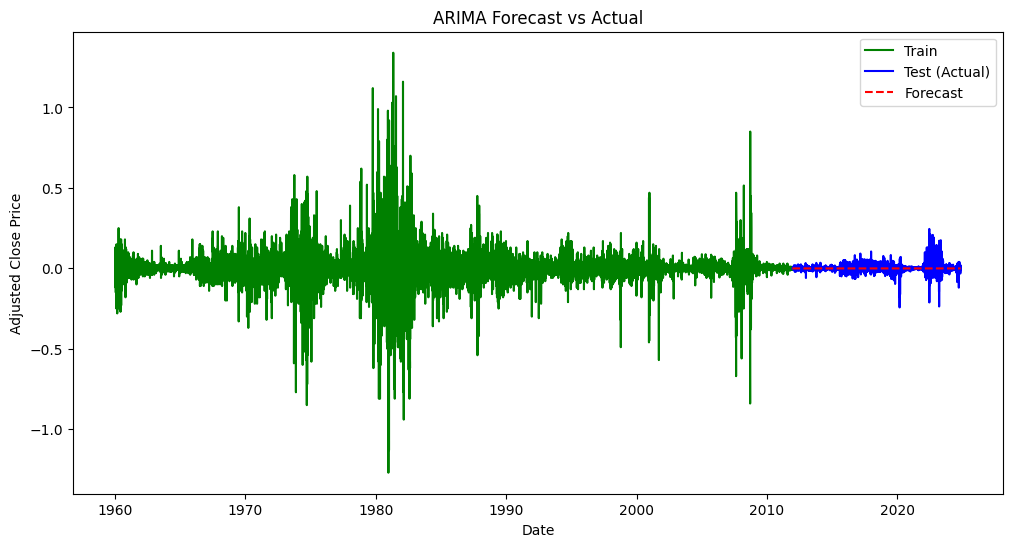

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_size = int(len(df['Adj Close_diff']) * 0.8)
train, test = df['Adj Close_diff'][:train_size], df['Adj Close_diff'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# Forecast
# Du doan cho tap train
# Du doan cho tap test
forecast = model_fit.forecast(steps=len(test))

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print('Test RMSE: %.3f' % rmse)

# Plot the actual, training, and forecast values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='green')
plt.plot(test.index, test, label='Test (Actual)', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Train RMSE: 0.096
Test RMSE: 7.922


/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


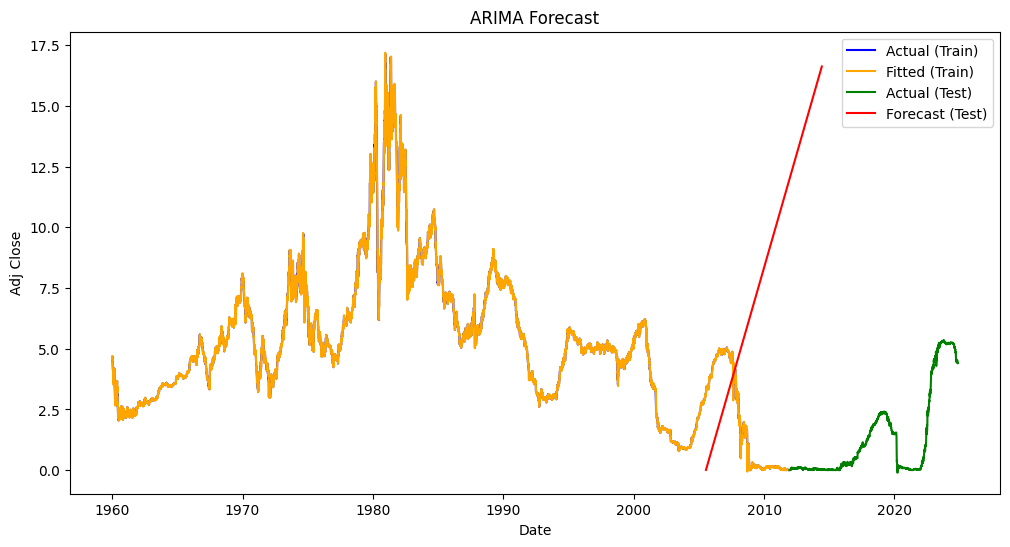

In [95]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_size = int(len(df['Adj Close']) * 0.8)
train, test = df['Adj Close'][:train_size], df['Adj Close'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # (p, d, q) tùy chỉnh theo kết quả chọn lọc
model_fit = model.fit()

# 1. Forecast on training set (in-sample prediction)
fitted_values = model_fit.predict(start=1, end=len(train)-1)  # Bắt đầu từ 1 vì đã sai phân
fitted_values.index = train.index[1:]  # Điều chỉnh chỉ số thời gian để khớp

# 2. Forecast on testing set (out-of-sample prediction)
forecast_diff = model_fit.forecast(steps=len(test))  # Dự báo chuỗi sai phân
forecast_test = test.iloc[0] + np.cumsum(forecast_diff)  # Tích hợp ngược dự báo

# 3. Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(train[1:], fitted_values))  # Bỏ giá trị đầu tiên do sai phân
rmse_test = np.sqrt(mean_squared_error(test, forecast_test))

print('Train RMSE: %.3f' % rmse_train)
print('Test RMSE: %.3f' % rmse_test)

# 4. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Actual (Train)', color='blue')
plt.plot(fitted_values.index, fitted_values, label='Fitted (Train)', color='orange')
plt.plot(test.index, test, label='Actual (Test)', color='green')
plt.plot(forecast_test.index, forecast_test, label='Forecast (Test)', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()


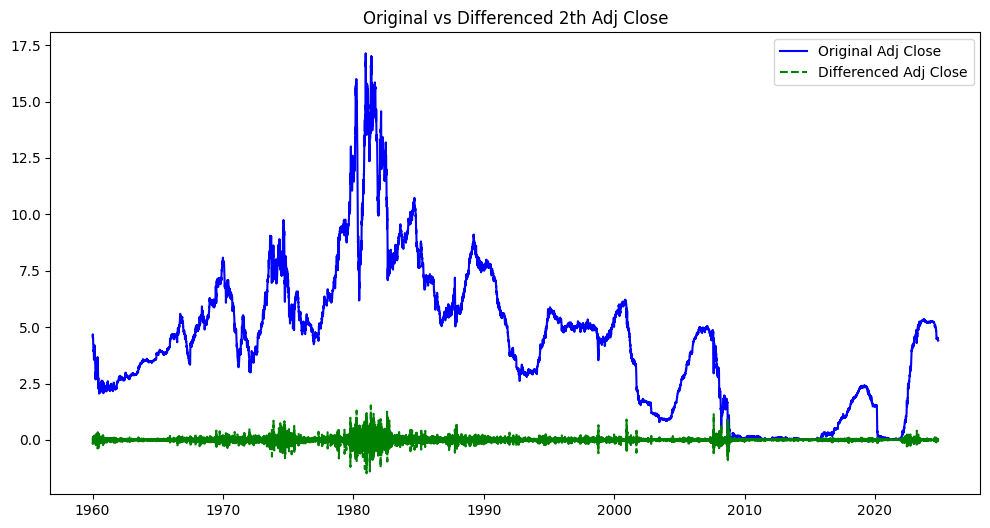

In [77]:
# Differencing
df['Adj Close_diff_diff'] = df['Adj Close_diff'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Original Adj Close', color='blue')
plt.plot(df['Adj Close_diff_diff'], label='Differenced Adj Close', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced 2th Adj Close')
plt.show()

The df['Adj Close'].diff() part calculates the difference between consecutive values in the ‘Adj Close’ column. This differencing operation is commonly used to transform a time series into a new series that represents the changes between consecutive observations.

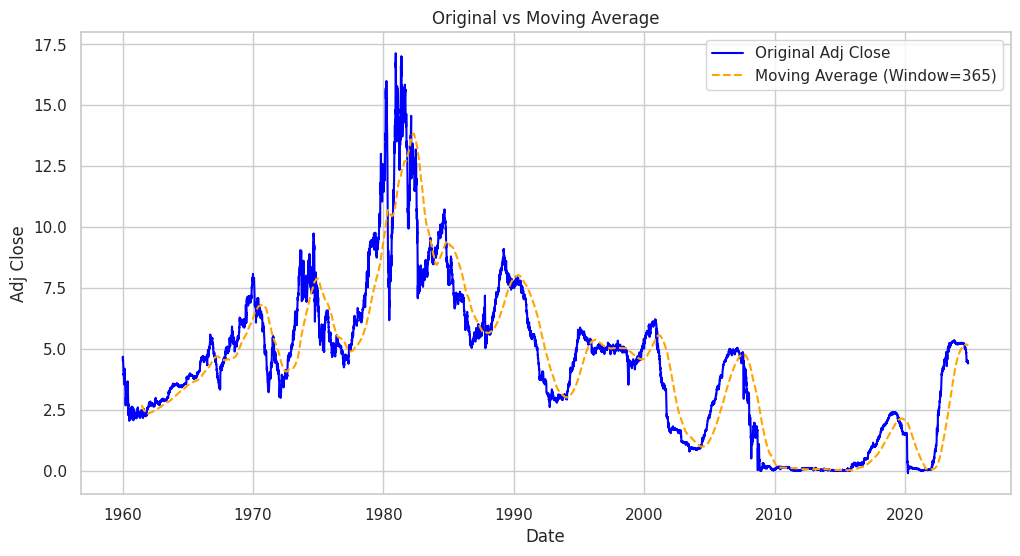

In [34]:
# Moving Average
window_size = 365 # 1 year window size
df['Adj Close_smoothed'] = df['Adj Close'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['Adj Close'], label='Original Adj Close', color='blue')
plt.plot(df['Adj Close_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()


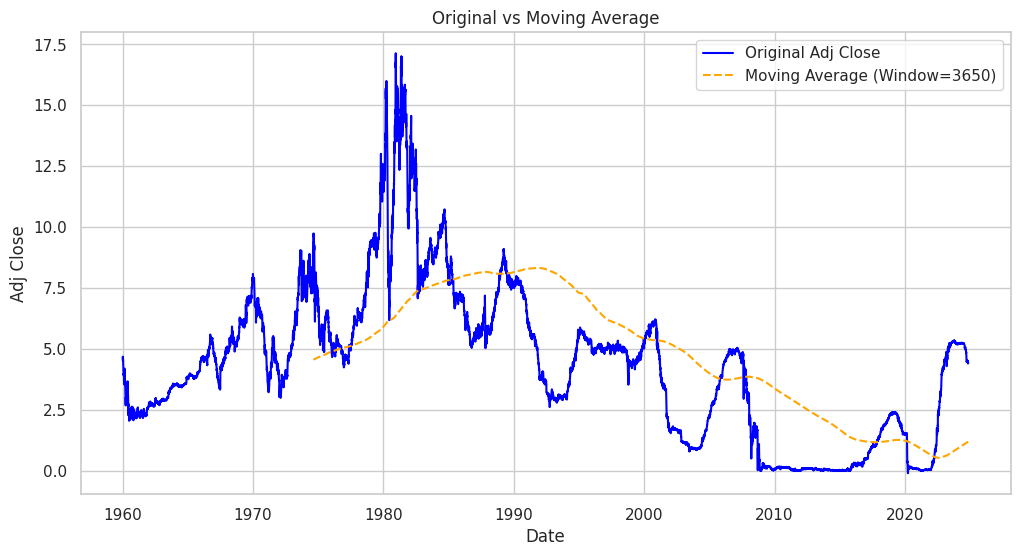

In [35]:
# Moving Average
window_size = 10 * 365 # 10 year window size
df['Adj Close_smoothed'] = df['Adj Close'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['Adj Close'], label='Original Adj Close', color='blue')
plt.plot(df['Adj Close_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

# Original Data Vs Differenced Data

Printing the original and differenced data side by side we get;

In [36]:
# Create a DataFrame with 'Adj Close' and 'Adj Close_diff' columns side by side
df_combined = pd.concat([df['Adj Close'], df['Adj Close_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())


            Adj Close  Adj Close_diff
Date                                 
1960-01-04       4.52             NaN
1960-01-05       4.55            0.03
1960-01-06       4.68            0.13
1960-01-07       4.63           -0.05
1960-01-08       4.59           -0.04


In [37]:
# Remove rows with missing values
df.dropna(subset=['Adj Close_diff'], inplace=True)
df['Adj Close_diff'].head()

Date
1960-01-05    0.03
1960-01-06    0.13
1960-01-07   -0.05
1960-01-08   -0.04
1960-01-11   -0.05
Name: Adj Close_diff, dtype: float64

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -19.013830215965182
p-value: 0.0
Critical Values: {'1%': -3.430754123671558, '5%': -2.8617186061399704, '10%': -2.566865067570841}


Based on the ADF Statistici. e < all Critical Values, So, we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis. The data appear to be stationary according to the Augmented Dickey-Fuller test.

This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.

# Cumulative Moving Average (CMA)

In [39]:
# importing Libraries

# importing pandas as pd
import pandas as pd

# importing numpy as np
# for Mathematical calculations
import numpy as np

# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

# Extract and isolate 'Close' column, converting to DataFrame
# df_ = df['Adj Close'].to_frame()

# Calculate Cumulative Moving Average (CMA) with a window of 30
df['CMA30'] = df['Adj Close'].expanding().mean()

# Print DataFrame
df


,Open,High,Low,Close,Adj Close,Volume,Adj Close_diff,Adj Close_smoothed,CMA30
Date,,,,,,,,,
1960-01-05,4.550,4.550,4.550,4.550,4.550,0,0.030,NaN,4.550000
1960-01-06,4.680,4.680,4.680,4.680,4.680,0,0.130,NaN,4.615000
1960-01-07,4.630,4.630,4.630,4.630,4.630,0,-0.050,NaN,4.620000
1960-01-08,4.590,4.590,4.590,4.590,4.590,0,-0.040,NaN,4.612500
1960-01-11,4.540,4.540,4.540,4.540,4.540,0,-0.050,NaN,4.598000
...,...,...,...,...,...,...,...,...,...
2024-11-04,4.395,4.420,4.385,4.418,4.418,0,0.018,1.183902,4.361700
2024-11-05,4.425,4.428,4.420,4.423,4.423,0,0.005,1.185071,4.361704
2024-11-06,4.428,4.435,4.420,4.430,4.430,0,0.007,1.186245,4.361708


<Axes: xlabel='Date'>

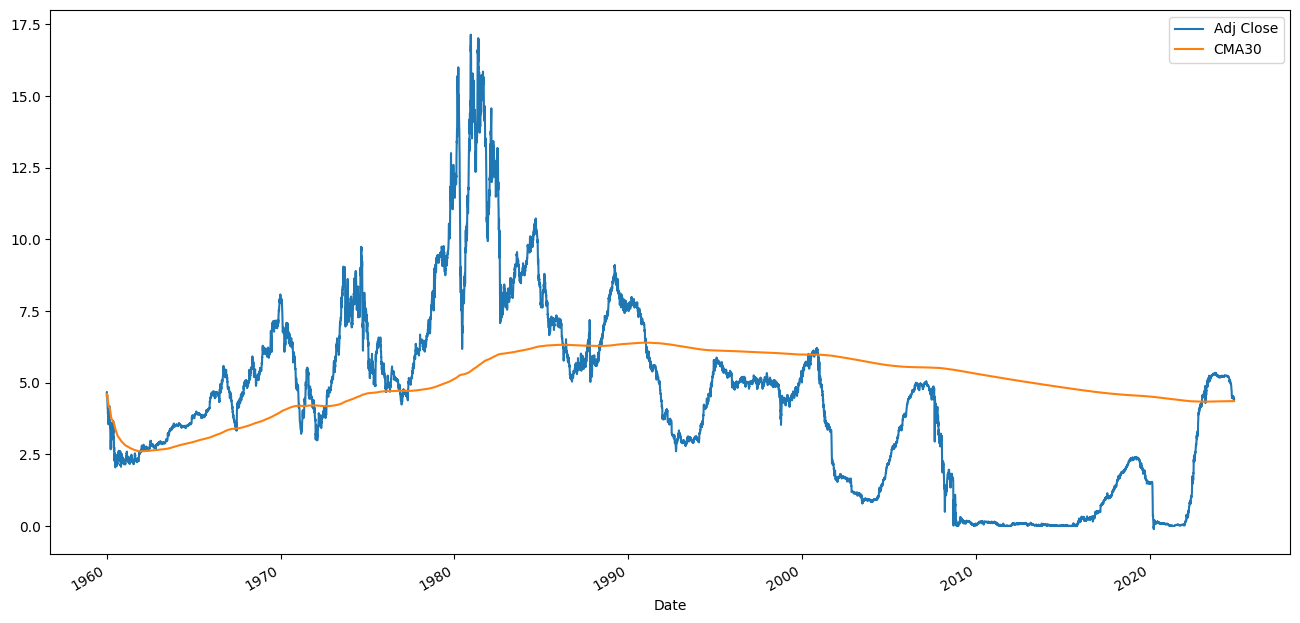

In [40]:
# plotting Close price and cumulative moving
# average of 30 days using .plot() method
df[['Adj Close', 'CMA30']].plot(label='Adj Close', figsize=(16, 8))


# Exponential Moving Average (EMA) Syntax 


In [41]:
# Extract and isolate 'Close' column, converting to DataFrame
# reliance = reliance['Close'].to_frame()

# Calculate Exponential Moving Average (EWMA) with a span of 30
df['EWMA30'] = df['Adj Close'].ewm(span=30).mean()

# Print DataFrame
df


,Open,High,Low,Close,Adj Close,Volume,Adj Close_diff,Adj Close_smoothed,CMA30,EWMA30
Date,,,,,,,,,,
1960-01-05,4.550,4.550,4.550,4.550,4.550,0,0.030,NaN,4.550000,4.550000
1960-01-06,4.680,4.680,4.680,4.680,4.680,0,0.130,NaN,4.615000,4.617167
1960-01-07,4.630,4.630,4.630,4.630,4.630,0,-0.050,NaN,4.620000,4.621733
1960-01-08,4.590,4.590,4.590,4.590,4.590,0,-0.040,NaN,4.612500,4.612989
1960-01-11,4.540,4.540,4.540,4.540,4.540,0,-0.050,NaN,4.598000,4.596382
...,...,...,...,...,...,...,...,...,...,...
2024-11-04,4.395,4.420,4.385,4.418,4.418,0,0.018,1.183902,4.361700,4.532507
2024-11-05,4.425,4.428,4.420,4.423,4.423,0,0.005,1.185071,4.361704,4.525442
2024-11-06,4.428,4.435,4.420,4.430,4.430,0,0.007,1.186245,4.361708,4.519285


<Axes: xlabel='Date'>

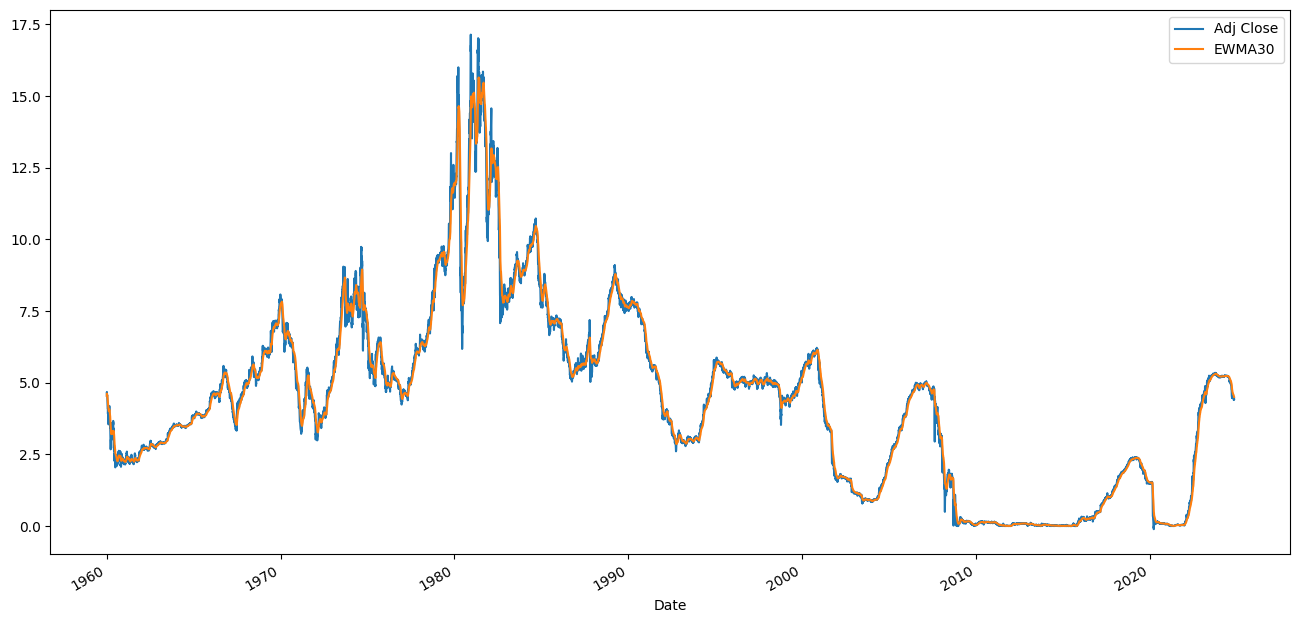

In [42]:
# plotting Adj Close price and exponential 
# moving averages of 30 days
# using .plot() method
df[['Adj Close', 'EWMA30']].plot(label='Adj Close', figsize=(16, 8))


# Trend in time series

## Decomposition (khu di phan trend)

To see the complexity behind linear visualization we can decompose the data. The function called seasonal_decompose within the statsmodels package can help us to decompose the data into its components/show patterns — trend, seasonality and residual components of time series. Here we are interested in trend component only so will access it using seasonal_decompose().trend .

seasonal_decompose function uses moving averages method to estimate the trend.

```
statsmodels.tsa.seasonal.seasonal_decompose(x, model=’additive’, period=None, extrapolate_trend=0)

Important parameters : 


    x : array-like.  Time-Series.  If 2d, individual series are in columns. x must contain 2 complete cycles.

    model : {“additive”, “multiplicative”}, optional (Depends on nature on seasonal component)

    period(freq.) : int, optional . Must be use if x is not pandas object or index of  x does not have a frequency.


Returns : A object with seasonal, trend, and resid attributes.
```

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

In [46]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close_diff,Adj Close_smoothed,CMA30,EWMA30
Date,,,,,,,,,,
1960-01-05,4.550,4.550,4.550,4.550,4.550,0,0.030,NaN,4.550000,4.550000
1960-01-06,4.680,4.680,4.680,4.680,4.680,0,0.130,NaN,4.615000,4.617167
1960-01-07,4.630,4.630,4.630,4.630,4.630,0,-0.050,NaN,4.620000,4.621733
1960-01-08,4.590,4.590,4.590,4.590,4.590,0,-0.040,NaN,4.612500,4.612989
1960-01-11,4.540,4.540,4.540,4.540,4.540,0,-0.050,NaN,4.598000,4.596382
...,...,...,...,...,...,...,...,...,...,...
2024-11-04,4.395,4.420,4.385,4.418,4.418,0,0.018,1.183902,4.361700,4.532507
2024-11-05,4.425,4.428,4.420,4.423,4.423,0,0.005,1.185071,4.361704,4.525442
2024-11-06,4.428,4.435,4.420,4.430,4.430,0,0.007,1.186245,4.361708,4.519285


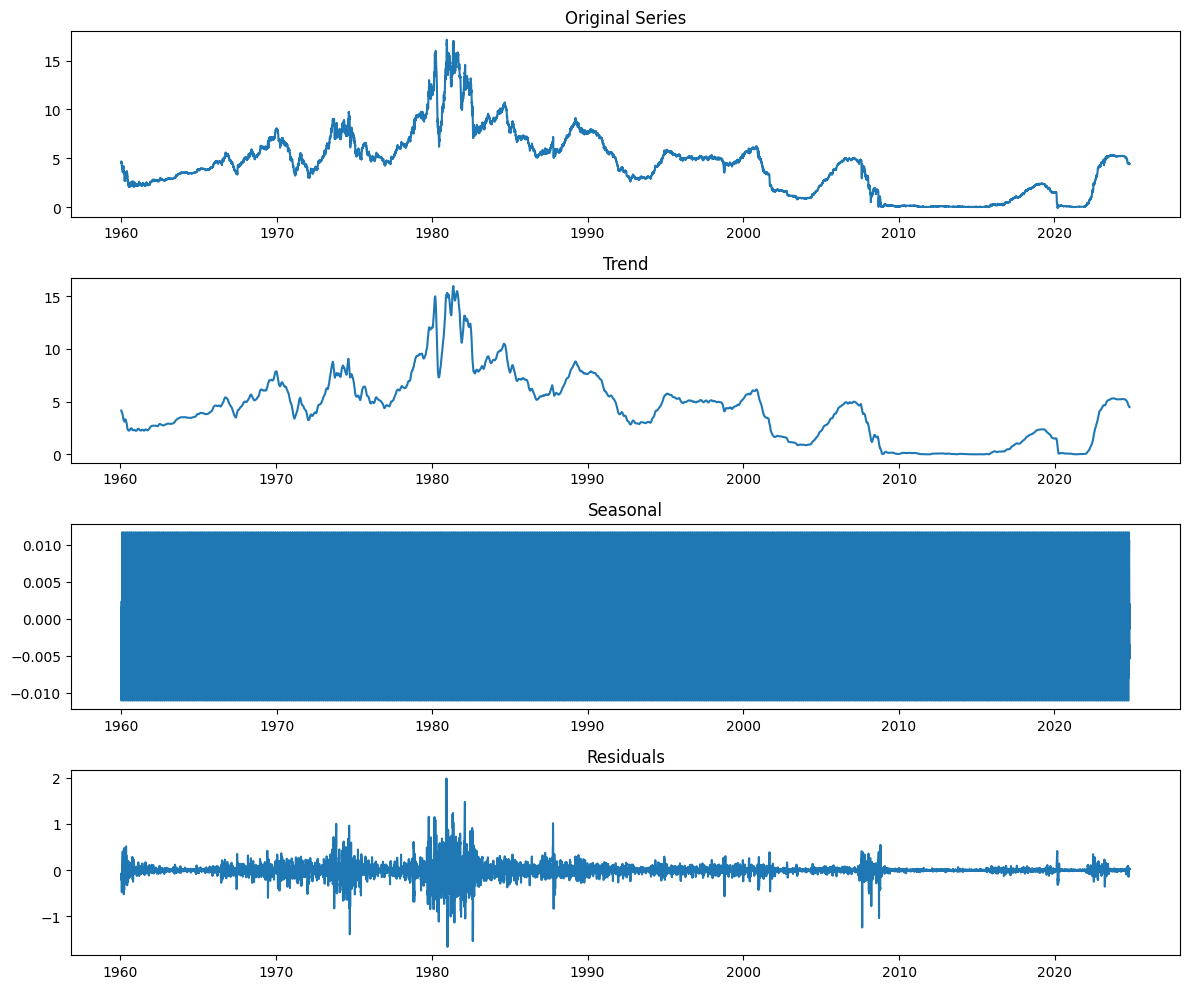

In [49]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close'], model='additive', period=30)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

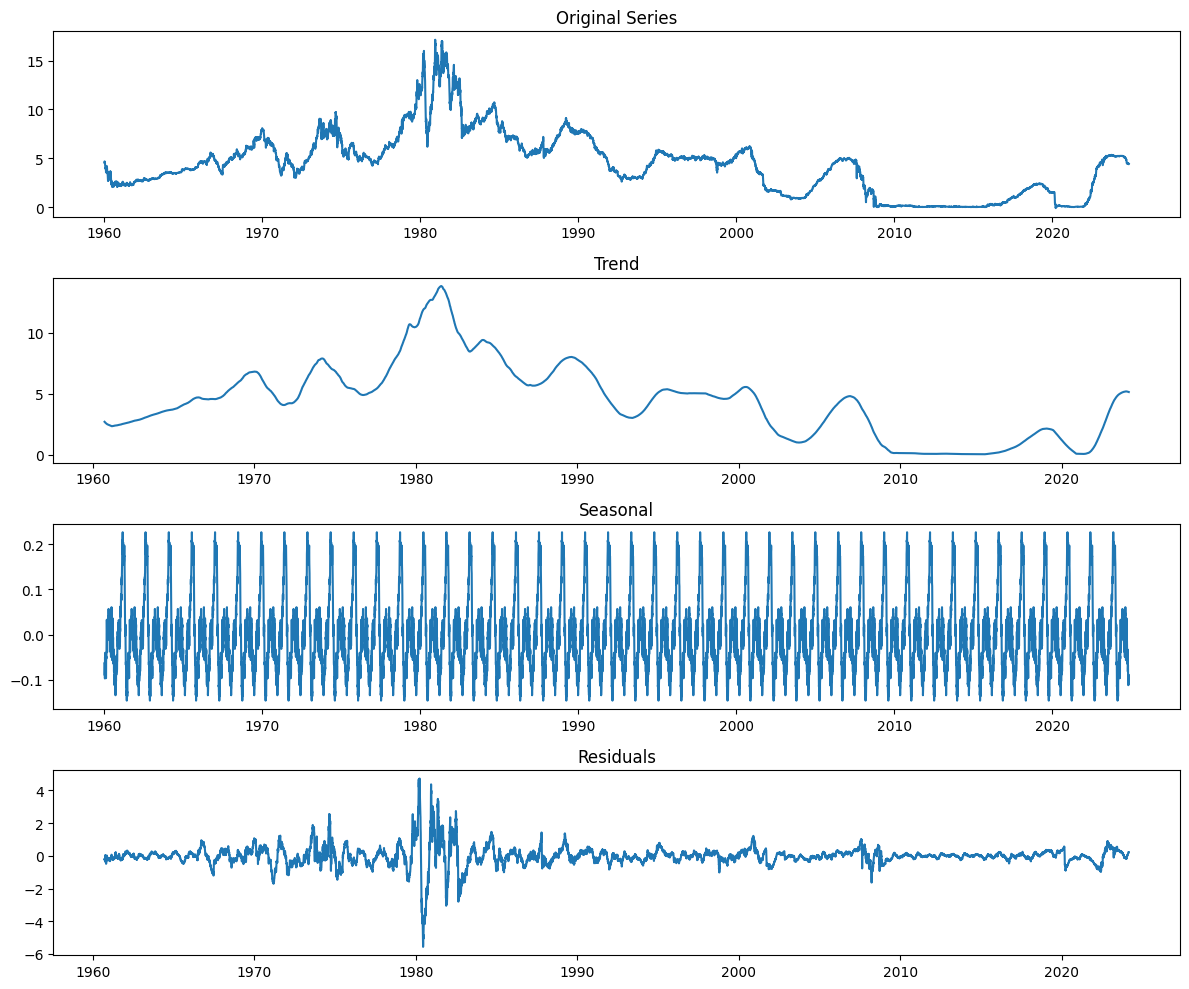

In [50]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close'], model='additive', period=365)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

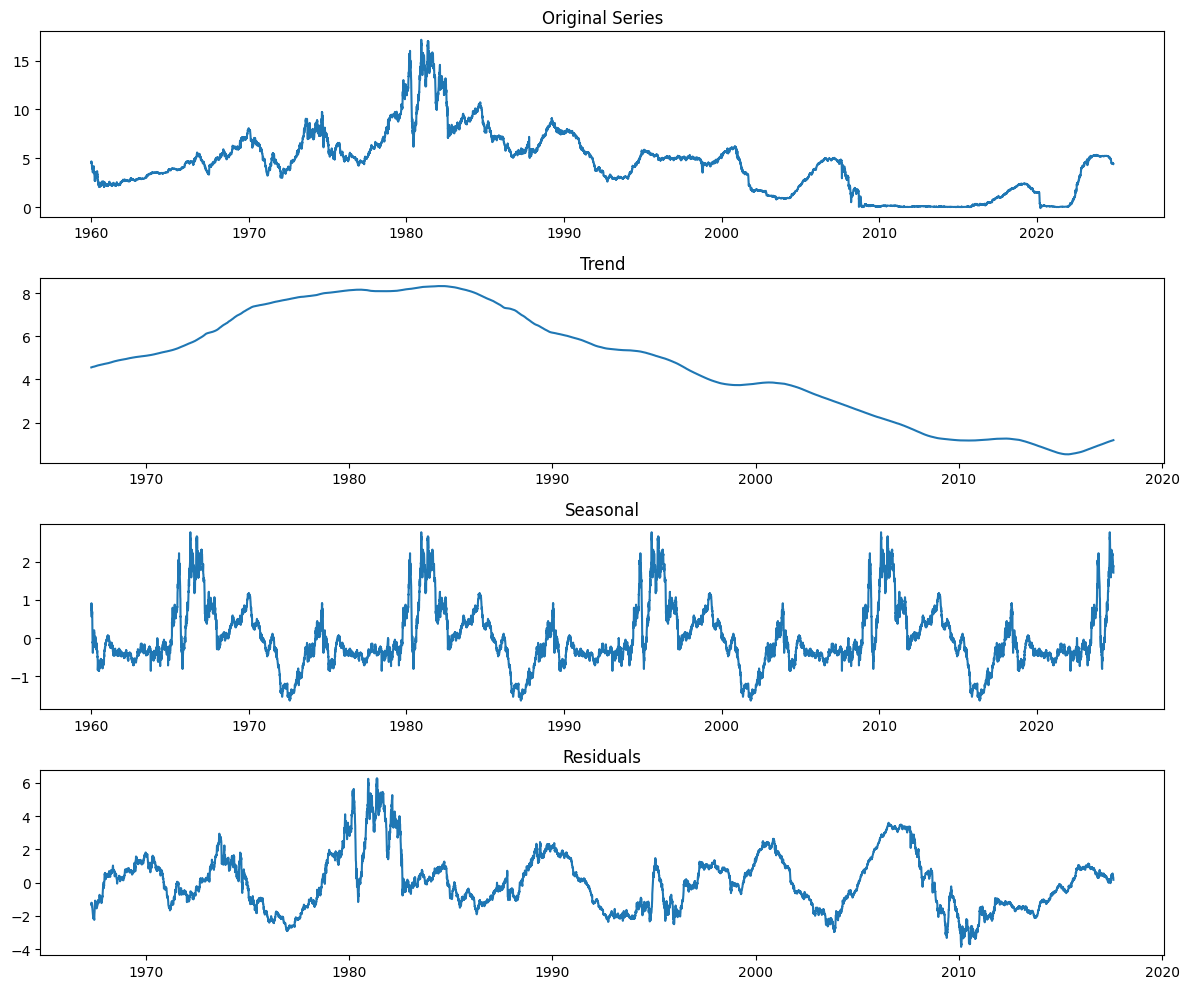

In [51]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close'], model='additive', period=3650)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

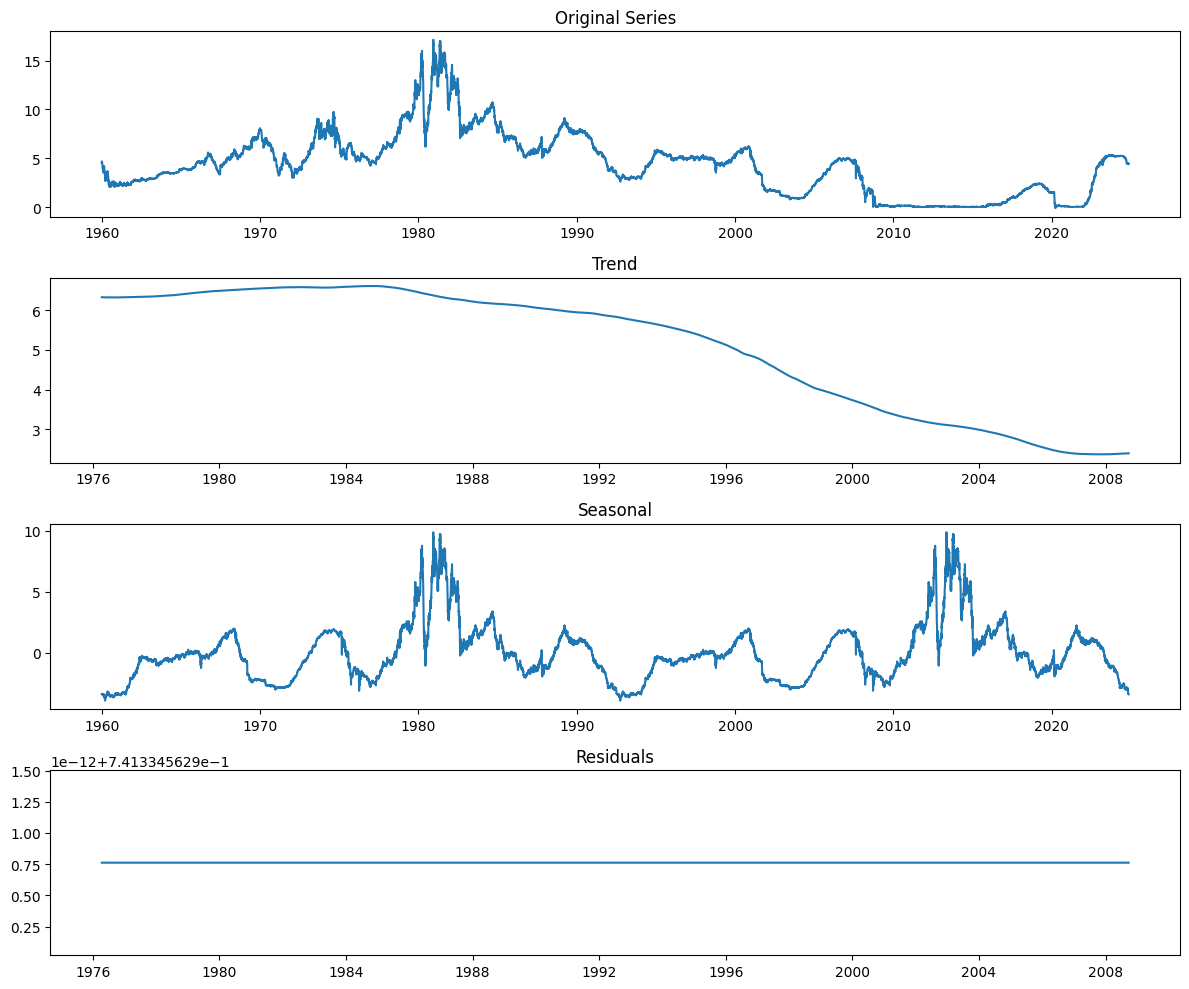

In [55]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close'], model='additive', period=int(16228 / 2))

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

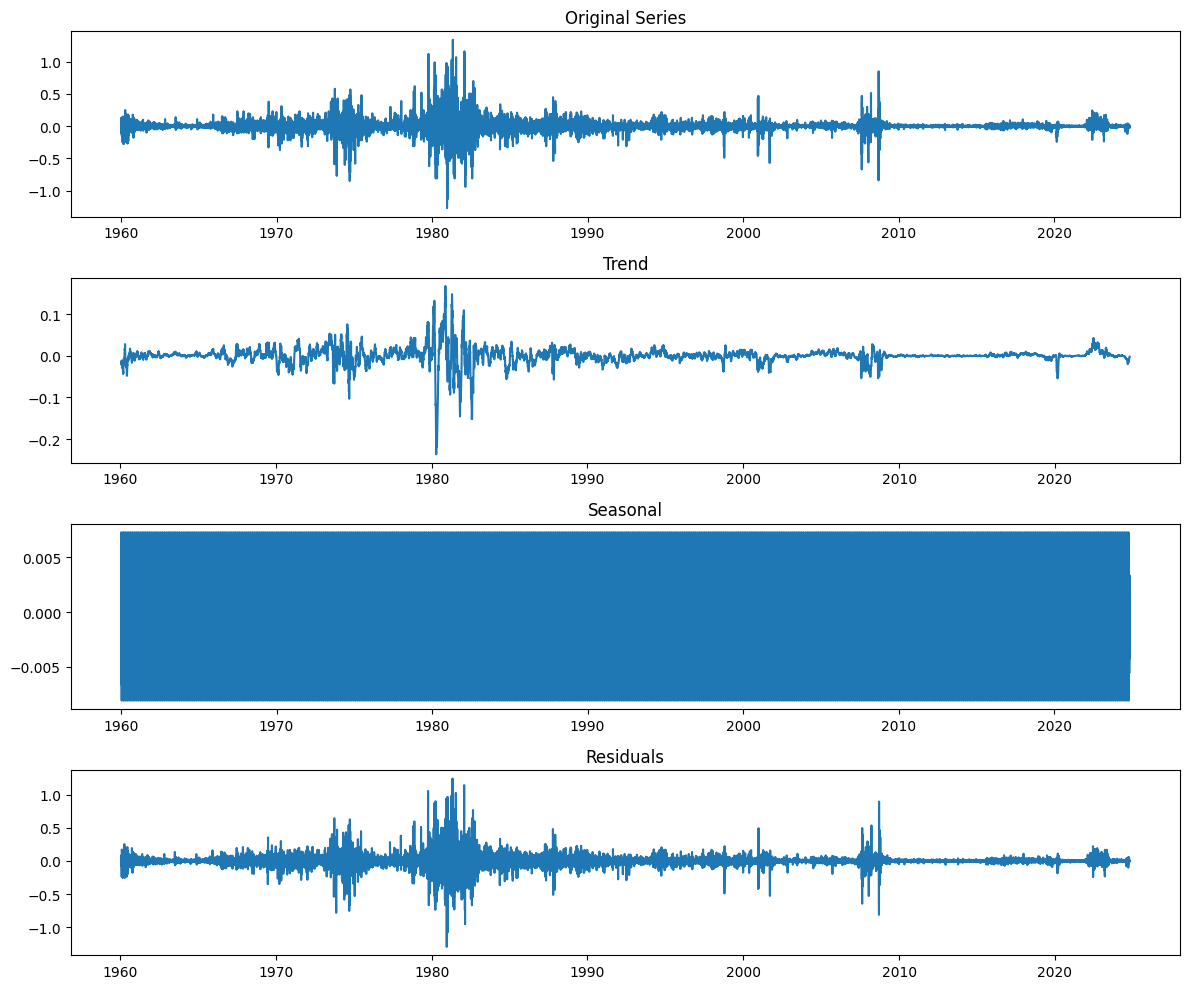

In [58]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close_diff'], model='additive', period=30)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close_diff'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

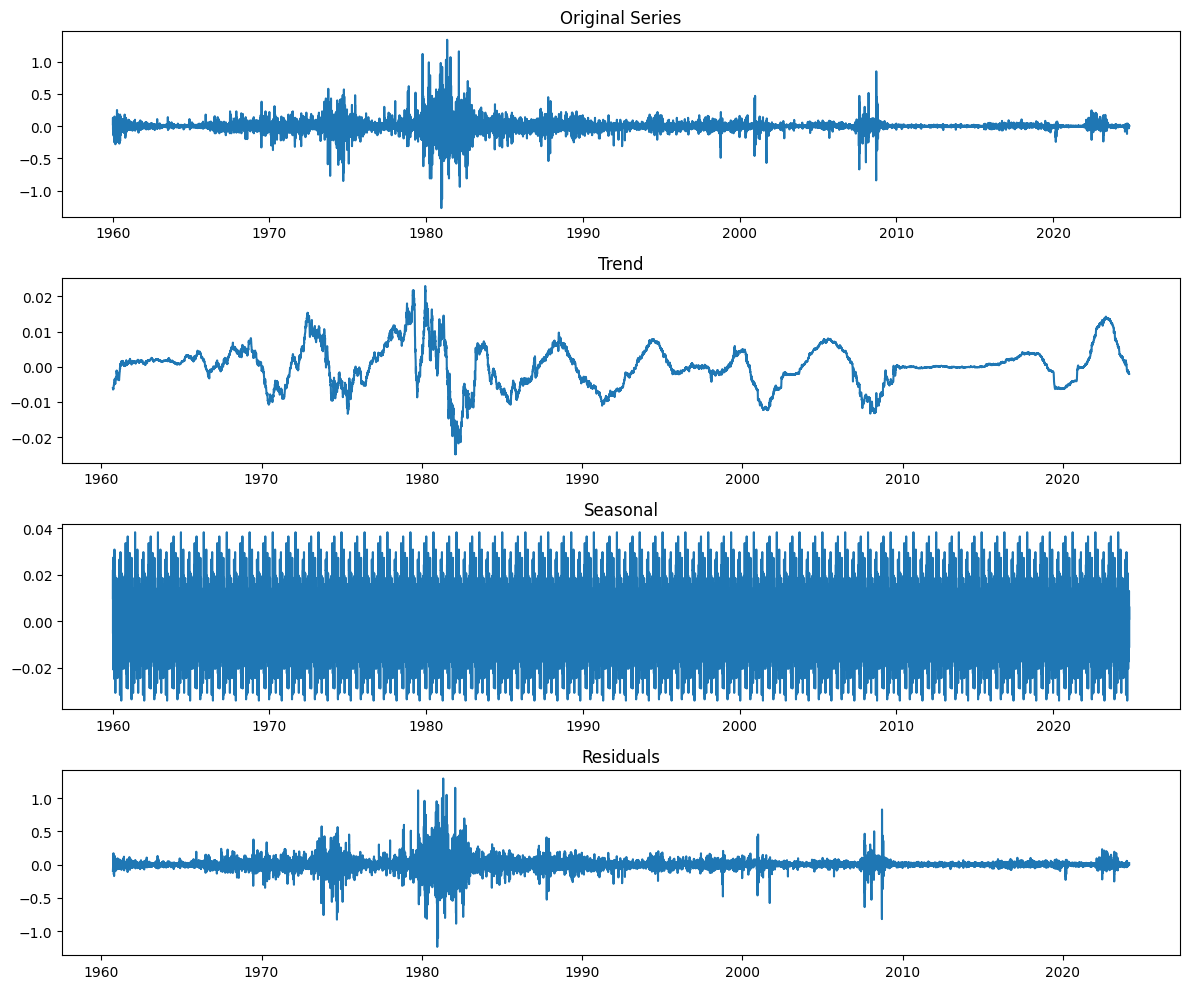

In [67]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close_diff'], model='additive', period=365)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close_diff'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

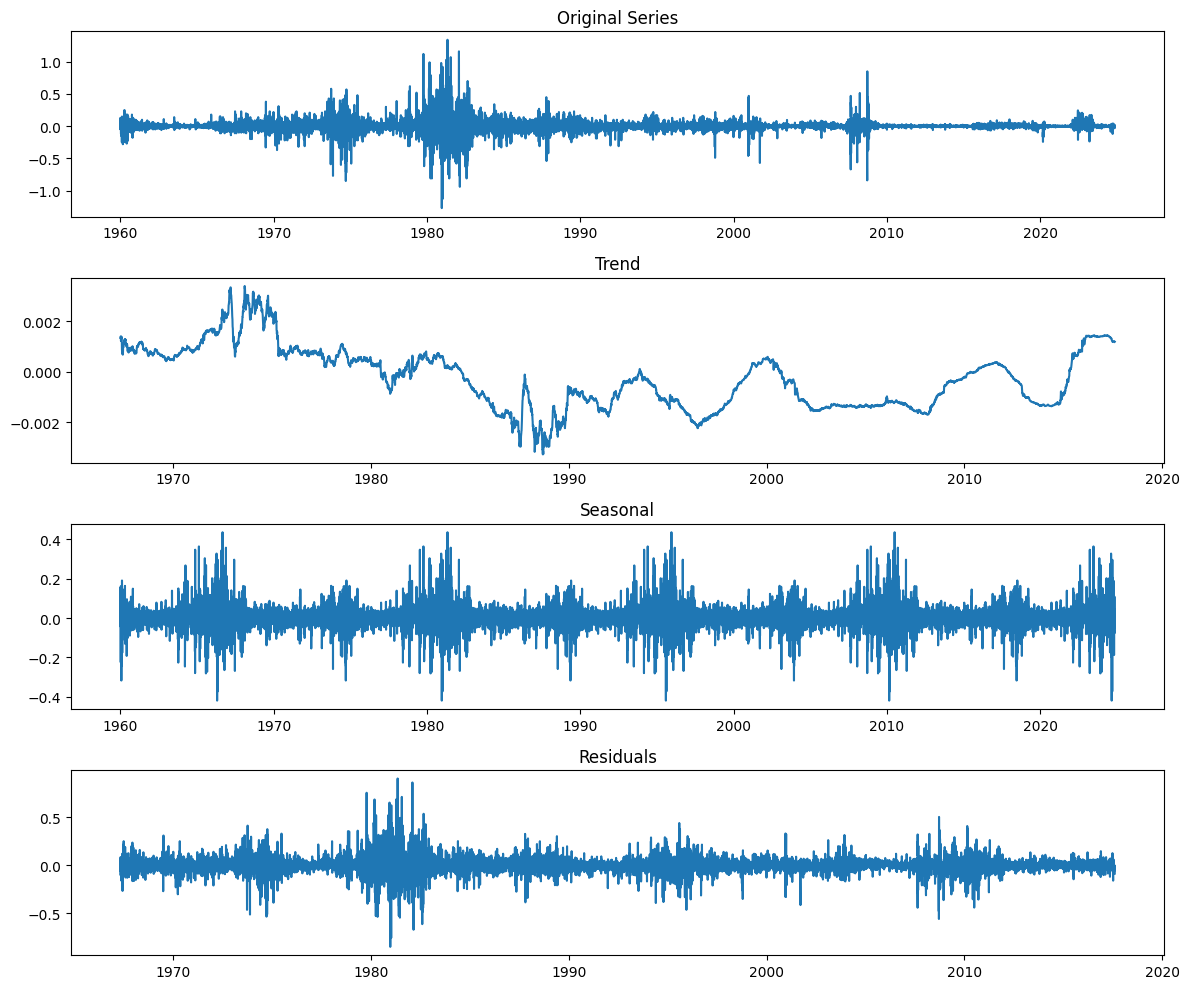

In [68]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close_diff'], model='additive', period=3650)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close_diff'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

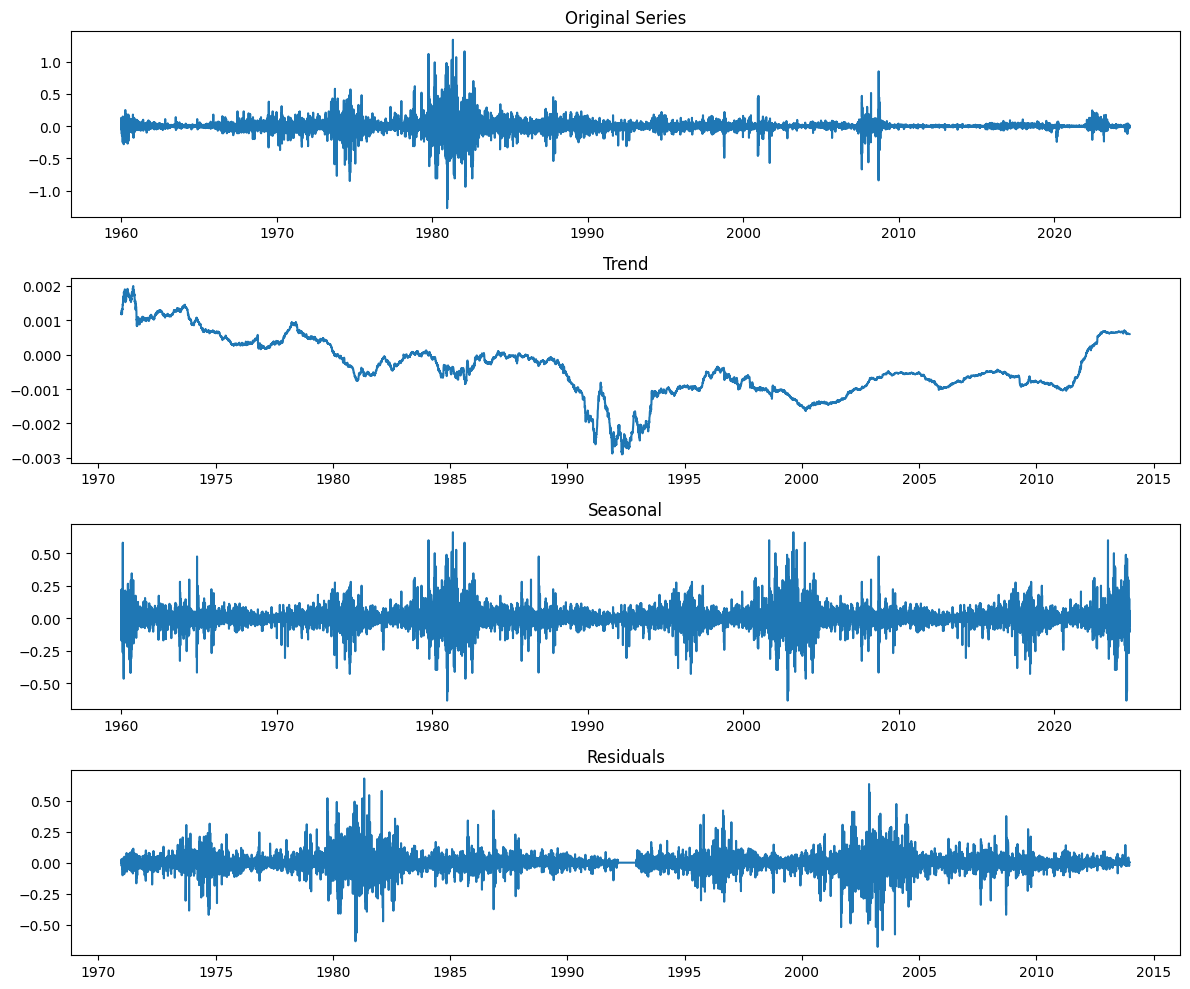

In [73]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close_diff'], model='additive', period=int(1.5 * 3650)) # 15 years

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close_diff'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

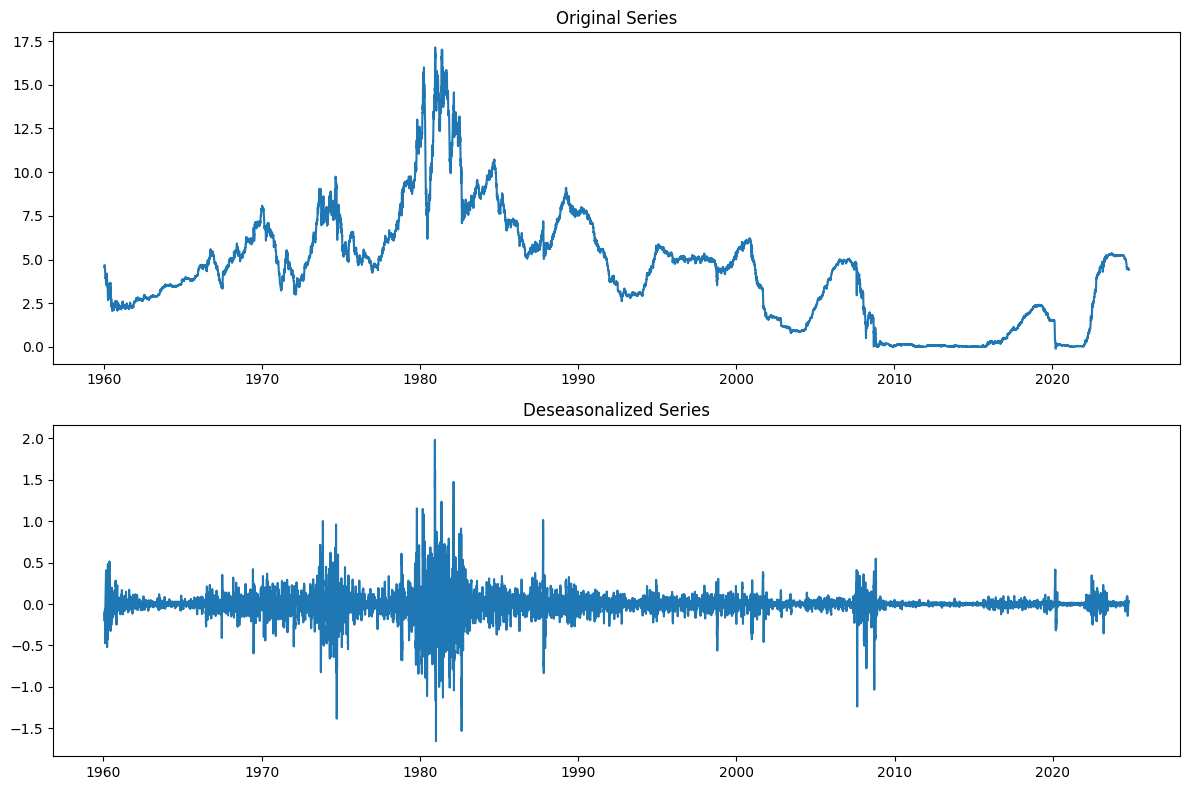

In [65]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Thực hiện phân tích theo mùa
result = seasonal_decompose(df['Adj Close'], model='additive', period=30)

# Tách các thành phần
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Tạo chuỗi thời gian đã loại bỏ mùa vụ
df['Adj Close_detrend_deseasonalized_1m'] = df['Adj Close'] - seasonal - trend

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close'])
ax1.set_title('Original Series')

# Biểu đồ chuỗi đã loại bỏ mùa vụ
ax2.plot(df.index, df['Adj Close_detrend_deseasonalized_1m'])
ax2.set_title('Deseasonalized Series')

plt.tight_layout()
plt.show()

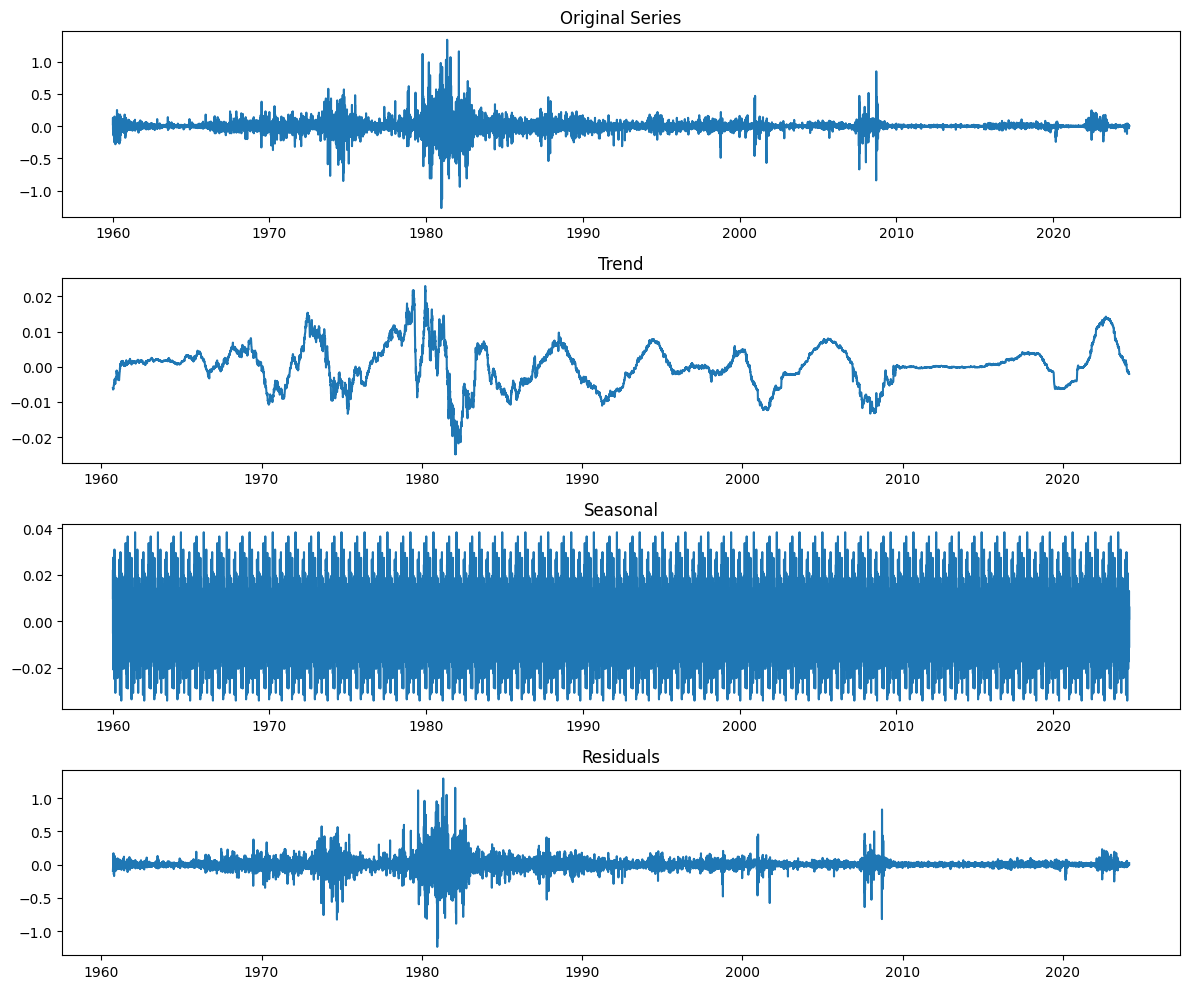

In [59]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close_diff'], model='additive', period=365)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close_diff'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

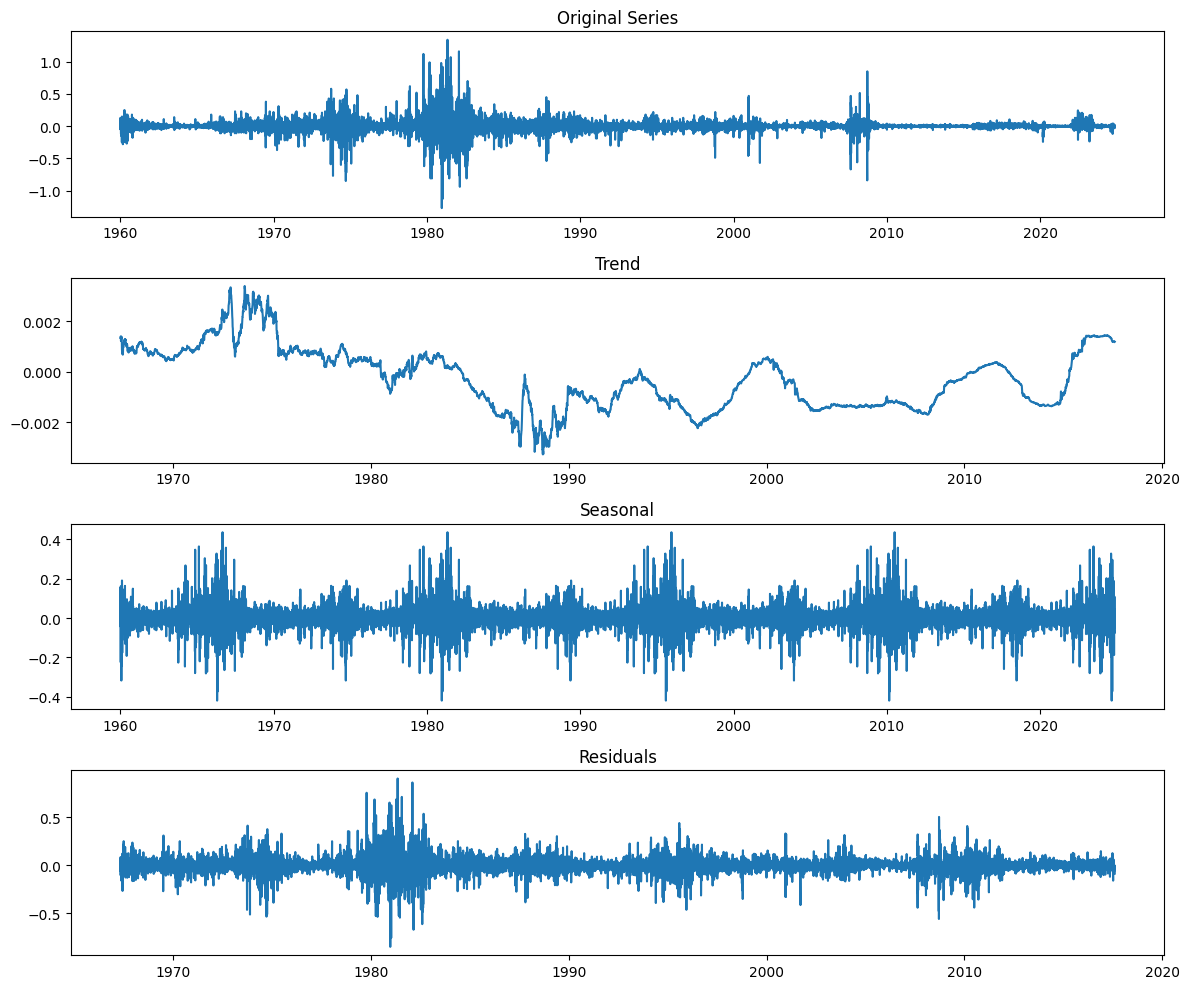

In [60]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['Adj Close_diff'], model='additive', period=3650)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['Adj Close_diff'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

In [74]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close_diff,Adj Close_smoothed,CMA30,EWMA30,Adj Close_deseasonalized_1m,Adj Close_detrend_deseasonalized_1m
Date,,,,,,,,,,,,
1960-01-05,4.550,4.550,4.550,4.550,4.550,0,0.030,NaN,4.550000,4.550000,4.549376,NaN
1960-01-06,4.680,4.680,4.680,4.680,4.680,0,0.130,NaN,4.615000,4.617167,4.678446,NaN
1960-01-07,4.630,4.630,4.630,4.630,4.630,0,-0.050,NaN,4.620000,4.621733,4.635037,NaN
1960-01-08,4.590,4.590,4.590,4.590,4.590,0,-0.040,NaN,4.612500,4.612989,4.597445,NaN
1960-01-11,4.540,4.540,4.540,4.540,4.540,0,-0.050,NaN,4.598000,4.596382,4.551029,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04,4.395,4.420,4.385,4.418,4.418,0,0.018,1.183902,4.361700,4.532507,4.419375,NaN
2024-11-05,4.425,4.428,4.420,4.423,4.423,0,0.005,1.185071,4.361704,4.525442,4.420982,NaN
2024-11-06,4.428,4.435,4.420,4.430,4.430,0,0.007,1.186245,4.361708,4.519285,4.431618,NaN


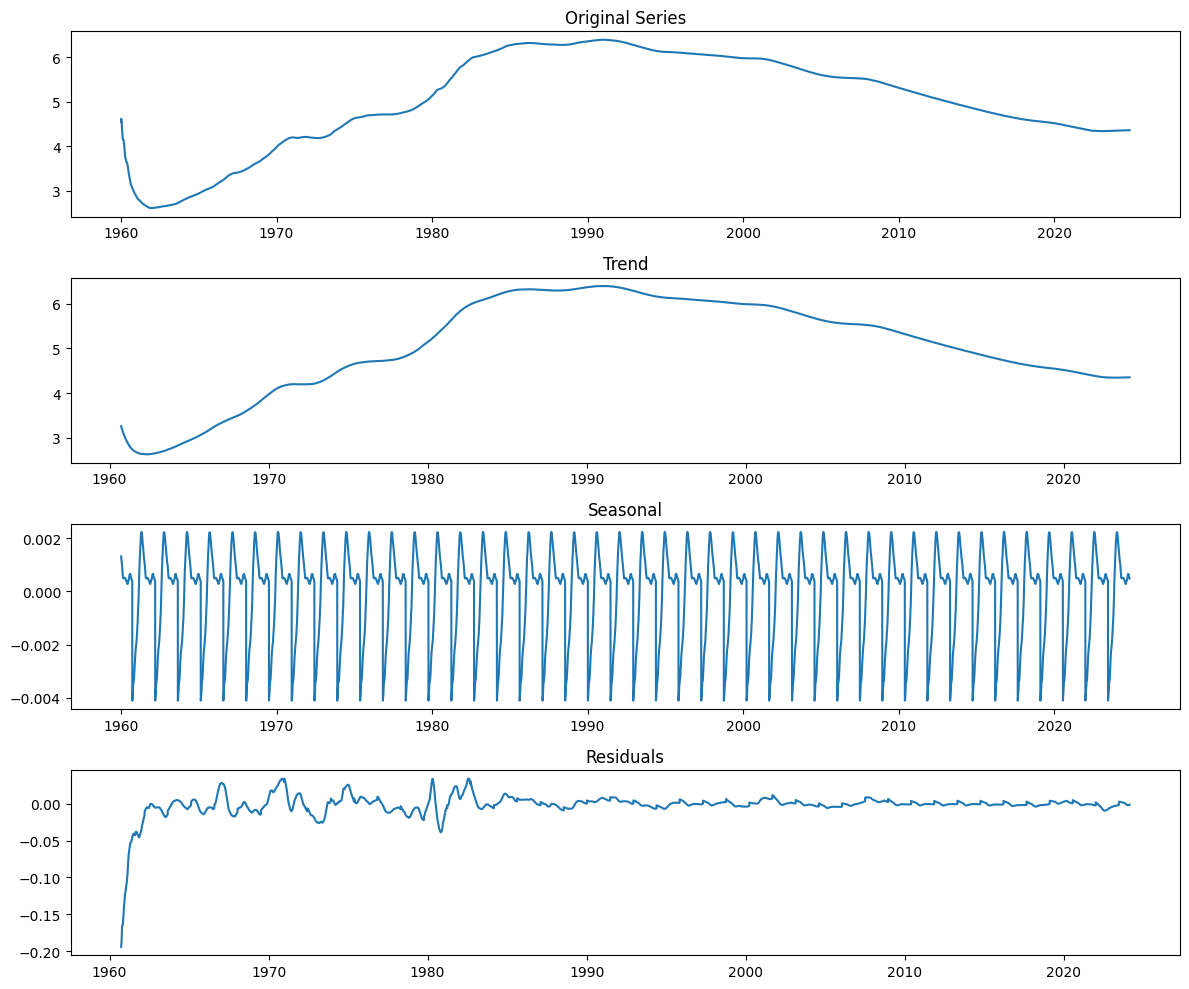

In [76]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tiến hành phân tích theo mùa
result = seasonal_decompose(df['CMA30'], model='additive', period=365)

# Vẽ kết quả phân tích
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Biểu đồ chuỗi gốc
ax1.plot(df.index, df['CMA30'])
ax1.set_title('Original Series')

# Biểu đồ xu hướng
ax2.plot(df.index, result.trend)
ax2.set_title('Trend')

# Biểu đồ mùa vụ
ax3.plot(df.index, result.seasonal)
ax3.set_title('Seasonal')

# Biểu đồ phần dư
ax4.plot(df.index, result.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Phân chia dữ liệu
train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train = data[:train_size]
val = data[train_size:train_size + val_size]
test = data[train_size + val_size:]